In [2]:
import plotly.graph_objs as go
import yfinance as yf
import numpy as np
import PySimpleGUI as sg
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

Stock symbol: amc
[*********************100%***********************]  1 of 1 completed


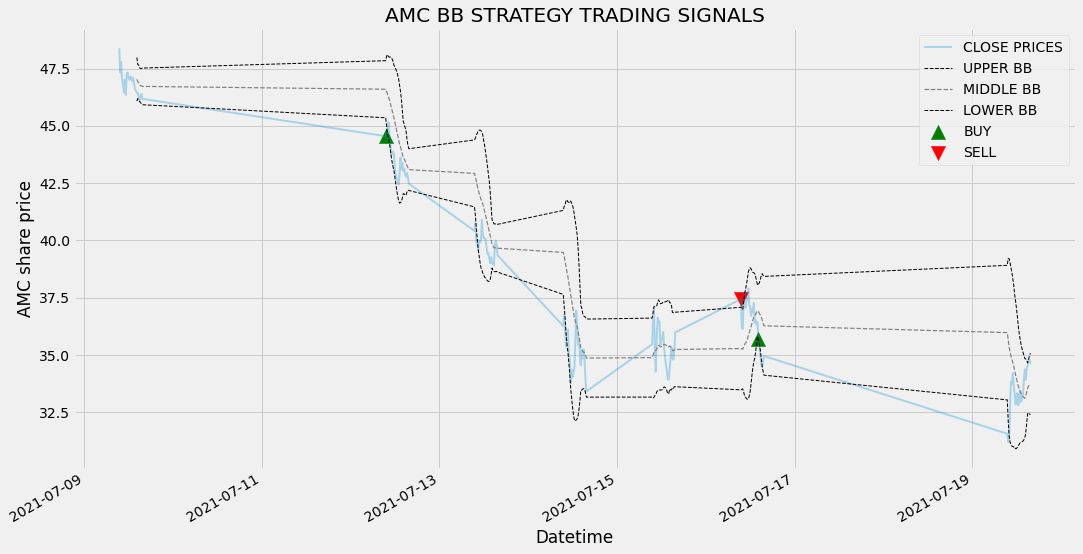

[*********************100%***********************]  1 of 1 completed
Today's $ AMC Data :


,Open,High,Low,Close,Adj Close,Volume,sma_20,upper_bb,lower_bb
Date,,,,,,,,,
2021-07-19,32.95,35.34,31.15,34.62,34.62,112628900,48.5275,66.33033,30.72467


In [5]:
# Create input function to take input from the user       
choice = input("Stock symbol: ")
choice = choice.upper()

# Import the historic date of user's choice of stock
stock_data = yf.download(tickers=choice, period = '7d', interval = '15m', rounding= True)

# Bollinger Bands calculation
def sma(data, window):
    sma = data.rolling(window = window).mean()
    return sma

stock_data['sma_20'] = sma(stock_data['Close'], 20)

def bb(data, sma, window):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * 2
    lower_bb = sma - std * 2
    return upper_bb, lower_bb

stock_data['upper_bb'], stock_data['lower_bb'] = bb(stock_data['Close'], stock_data['sma_20'], 20)


# create a BB trading strategy
# create buy/sell signal
def implement_bb_strategy(data, lower_bb, upper_bb):
    buy_price = []
    sell_price = []
    bb_signal = []
    signal = 0

    for i in range(len(data)):
        if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
            if signal != 1:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)

    return buy_price, sell_price, bb_signal

buy_price, sell_price, bb_signal = implement_bb_strategy(stock_data['Close'], stock_data['lower_bb'], stock_data['upper_bb'])


# Plot the Bollinger Bands values with the buy and sell signal
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [16,9]
stock_data['Close'].plot(label = 'CLOSE PRICES', alpha = 0.3, linewidth = 2)
stock_data['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
stock_data['sma_20'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'grey')
stock_data['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(stock_data.index, buy_price, marker = '^', color = 'green', label = 'BUY', s = 200)
plt.scatter(stock_data.index, sell_price, marker = 'v', color = 'red', label = 'SELL', s = 200)
plt.title(choice + ' BB STRATEGY TRADING SIGNALS')
plt.ylabel(choice + ' share price')
plt.legend(loc = 'upper right')
plt.show()

# Print the most recent stock data 
stock_data1 = yf.download(tickers=choice, period = '20d', interval = '1d', rounding= True)
def sma(data, window):
    sma = data.rolling(window = window).mean()
    return sma

stock_data1['sma_20'] = sma(stock_data1['Close'], 20)

def bb(data, sma, window):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * 2
    lower_bb = sma - std * 2
    return upper_bb, lower_bb

stock_data1['upper_bb'], stock_data1['lower_bb'] = bb(stock_data1['Close'], stock_data1['sma_20'], 20)

print("Today's", "$",choice, "Data :" )
stock_data1.tail(1)